### Shivanka Priyashan
### Index : 190476V

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Question 01

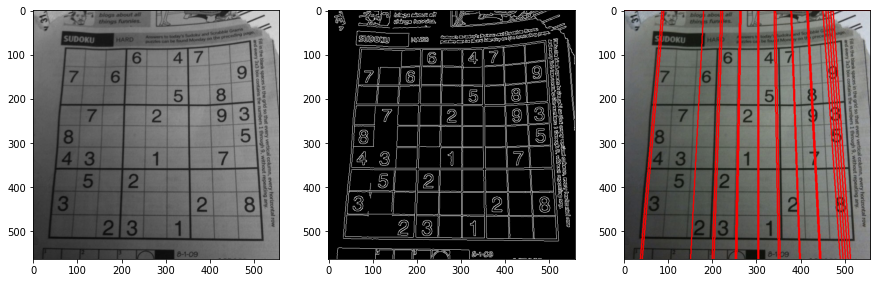

In [8]:
im = cv.imread(r"sudoku.png",cv.IMREAD_COLOR)
assert im is not None

gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray, 50, 150, apertureSize=3)
lines = cv.HoughLines(edges, 1, np.pi/180, 200)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0 + 1000*(-b)), int(x0 + 1000*a)
    x2, y2 = int(x0 - 1000*(-b)), int(x0 - 1000*a)
    cv.line(im, (x1, y1), (x2, y2), (0,0, 255), 2)


gray = cv.cvtColor(gray, cv.COLOR_BGR2RGB)
edges = cv.cvtColor(edges, cv.COLOR_BGR2RGB)
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 3, figsize = (15, 10))
ax[0].imshow(gray)
ax[1].imshow(edges)
ax[2].imshow(im)

plt.show()


#### Question 02

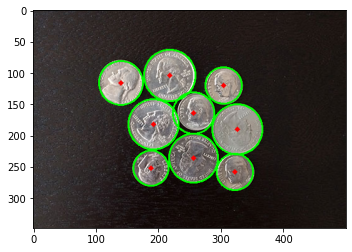

In [9]:
import cv2 as cv
import numpy as np
img = cv.imread(r"coins.jpg",cv.IMREAD_COLOR)
assert img is not None

im = cv.imread('coins.jpg', cv.IMREAD_COLOR)
assert im is not None
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

circles = cv.HoughCircles(gray,cv.HOUGH_GRADIENT,1,65,
                            param1=150,param2=20,minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(im,(i[0],i[1]),2,(0,0,255),3)

im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(im)

plt.show()

#### Question 03

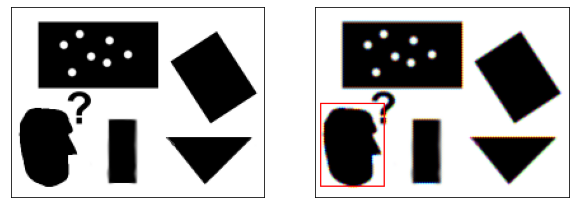

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp1 = cv.imread('templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

assert im is not None

im_edges = cv.Canny(im, 50, 250)
temp1_edges = cv.Canny(temp1, 50, 250)
alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp1_edges)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)
alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)
positions, votes = alg.detect(im_edges)

out = cv.cvtColor(im, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation in positions[0]:
    halfHeight = temp1.shape[0] / 2 * scale
    halfWidth = temp1.shape[1] / 2 * scale
    p1 = (int(x - halfWidth), int(y - halfHeight))
    p2 = (int(x + halfWidth), int(y + halfHeight))
    cv.rectangle(out,p1,p2,(0,0,255))
    
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])

plt.show()

#### Question 04

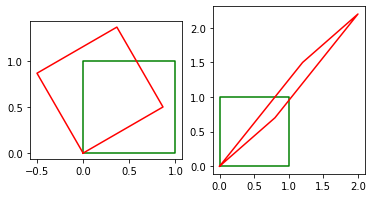

In [11]:
import matplotlib.pyplot as plt
import numpy as np

a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a, b, c, d]).T

theta = np.pi/180*30
s = 1
tx, ty = 0, 0
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx], [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
Y = H @ X

a11, a12, a21, a22 = 0.8, 1.2 ,0.7 , 1.5 # Must form a non singular matrix
A = np.array([[a11,a12,tx], [a21,a22,ty],[0,0,1]])

Z = A @ X 

x = np.append(X[0, :], X[0, 0])
y = np.append(X[1, :], X[1, 0])

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, y, color='g')
ax[0].set_aspect('equal')
ax[1].plot(x,y, color = 'g')
ax[1].set_aspect('equal')

x = np.append(Y[0, :], Y[0, 0])
y = np.append(Y[1, :], Y[1, 0])
ax[0].plot(x, y, color='r')
ax[0].set_aspect('equal')

x1 = np.append(Z[0, :], Z[0,0])
y1 = np.append(Z[1, :], Z[1,0])
ax[1].plot(x1,y1, color = 'r')
ax[1].set_aspect('equal')

plt.show()

#### Question 05

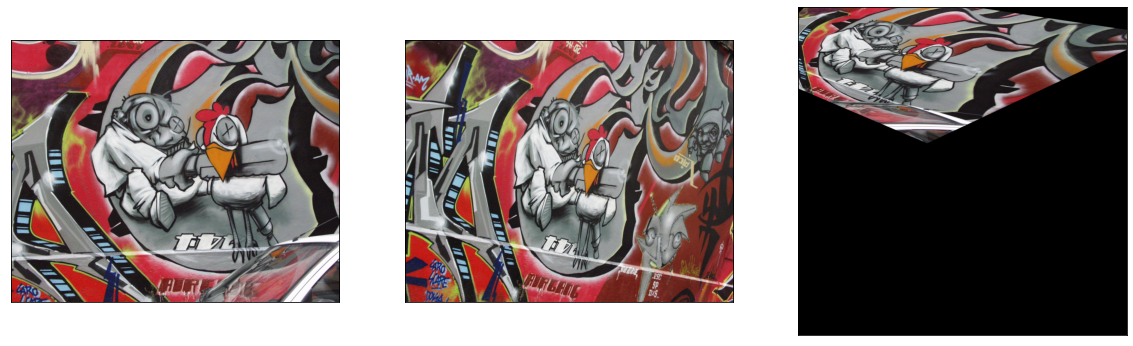

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread('img1.ppm',cv.IMREAD_ANYCOLOR)
img2 = cv.imread('img3.ppm',cv.IMREAD_ANYCOLOR)

H = np.array( [[6.6378505e-01,   6.8003334e-01,  -3.1230335e+01],
  [-1.4495500e-01,   9.7128304e-01,   1.4877420e+02],
   [4.2518504e-04,  -1.3930359e-05,   1.0000000e+00]])

img1to4 = cv.warpPerspective(img1,np.linalg.inv(H),(2000,2000))


fig, ax = plt.subplots(1,3,figsize= (20,10))

ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(img1to4, cv.COLOR_BGR2RGB))

ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

